 STEP 1:Load the dataset 
Shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides        

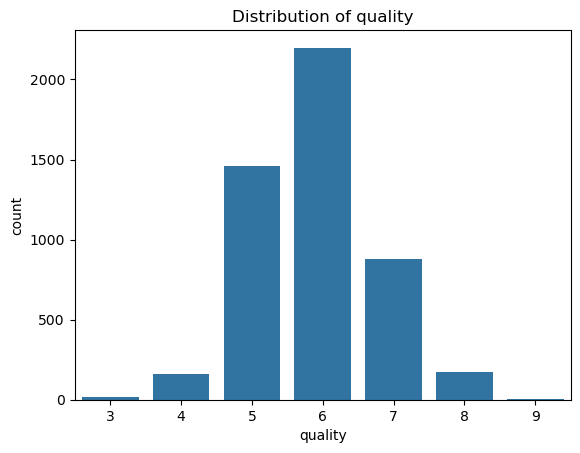

🔢 STEP 3: UNIQUE VALUES / DISTRIBUTION

Column: fixed acidity
------------------------------
Number of unique values: 68
Value counts:
 fixed acidity
6.8     308
6.6     290
6.4     280
6.9     241
6.7     236
       ... 
4.5       1
4.6       1
11.8      1
14.2      1
3.9       1
Name: count, Length: 68, dtype: int64
Percentage distribution (%):
 fixed acidity
6.8     6.29
6.6     5.92
6.4     5.72
6.9     4.92
6.7     4.82
        ... 
4.5     0.02
4.6     0.02
11.8    0.02
14.2    0.02
3.9     0.02
Name: proportion, Length: 68, dtype: float64

Column: volatile acidity
------------------------------
Number of unique values: 125
Value counts:
 volatile acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.545      1
0.135      1
0.905      1
0.685      1
0.355      1
Name: count, Length: 125, dtype: int64
Percentage distribution (%):
 volatile acidity
0.280    5.37
0.240    5.17
0.260    4.90
0.250    4.72
0.220    4.68
         ... 
0.545    0.02
0.1

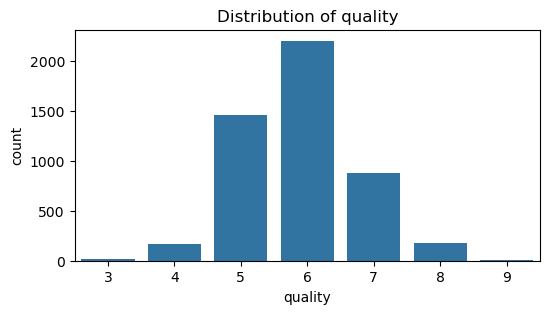

❌ STEP 4: MISSING VALUES & DUPLICATES

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values in dataset: 0

Number of duplicate rows: 937
Duplicates removed. New dataset shape: (3961, 12)
⚠️ STEP 5: OUTLIER / RANGE CHECK
Min and Max values per numeric column:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            3.8              0.08         0.00             0.6      0.009   
max           14.2              1.10         1.66            65.8      0.346   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  2.0                   9.0  0.98711  2.72       0.22   
max                289.0 

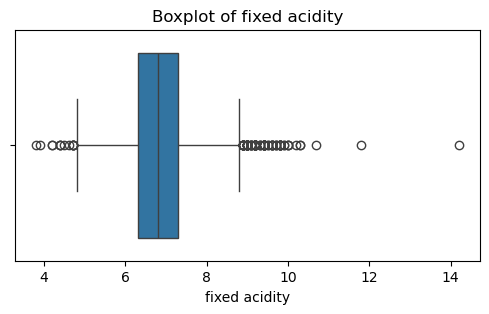

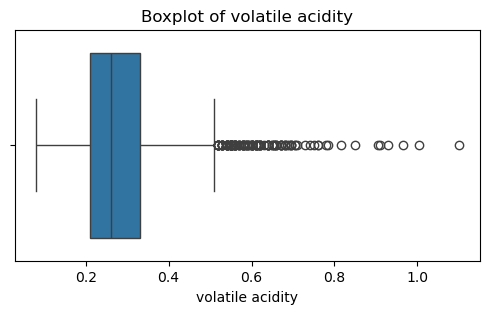

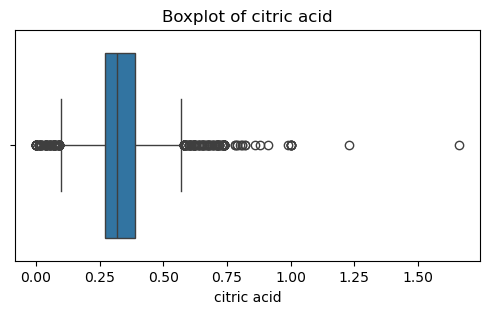

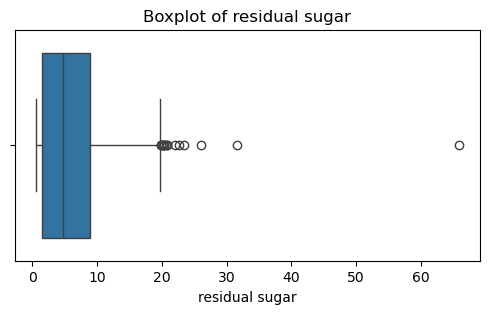

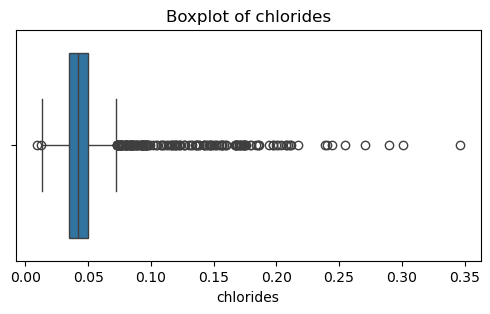

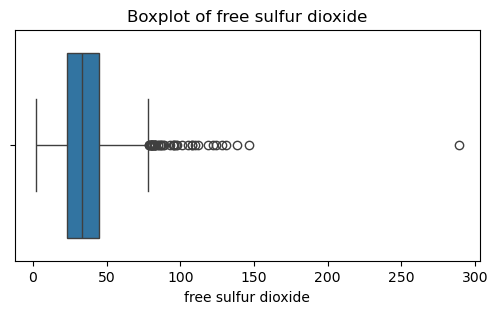

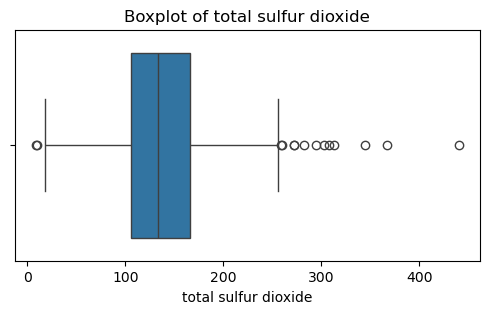

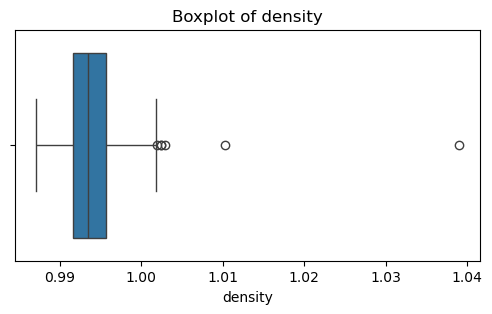

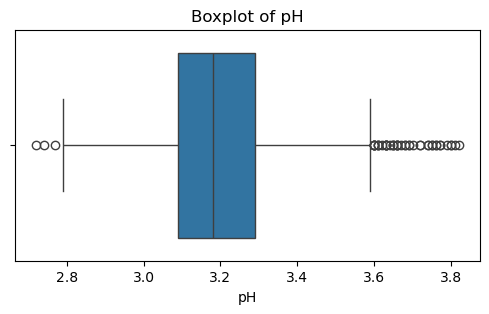

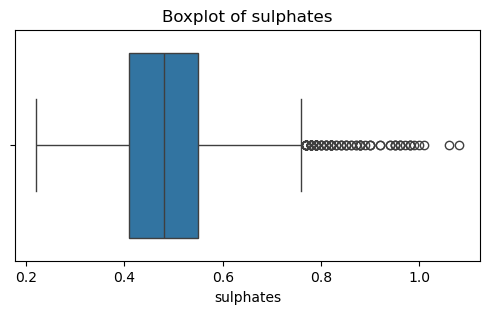

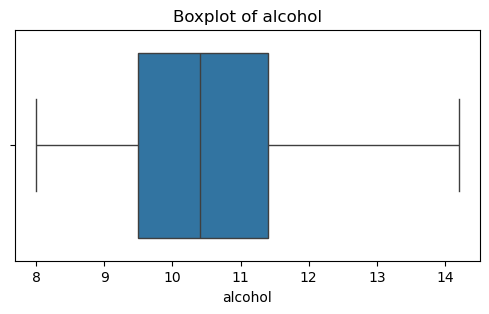

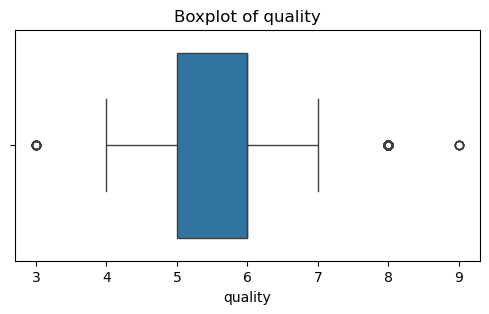


Potential outliers (IQR method):
fixed acidity: 106 potential outlier rows
volatile acidity: 133 potential outlier rows
citric acid: 223 potential outlier rows
residual sugar: 16 potential outlier rows
chlorides: 178 potential outlier rows
free sulfur dioxide: 44 potential outlier rows
total sulfur dioxide: 14 potential outlier rows
density: 6 potential outlier rows
pH: 46 potential outlier rows
sulphates: 96 potential outlier rows
alcohol: 0 potential outlier rows
quality: 156 potential outlier rows

Shape after removing outliers: (3083, 12)

Outlier handling complete. Original dataset remains safe in df_original.
⚠️ STEP 6: ZERO / NEGATIVE VALUE CHECKS
fixed acidity: zeros = 0, negatives = 0
volatile acidity: zeros = 0, negatives = 0
citric acid: zeros = 18, negatives = 0
residual sugar: zeros = 0, negatives = 0
chlorides: zeros = 0, negatives = 0
free sulfur dioxide: zeros = 0, negatives = 0
total sulfur dioxide: zeros = 0, negatives = 0
density: zeros = 0, negatives = 0
pH: zeros 

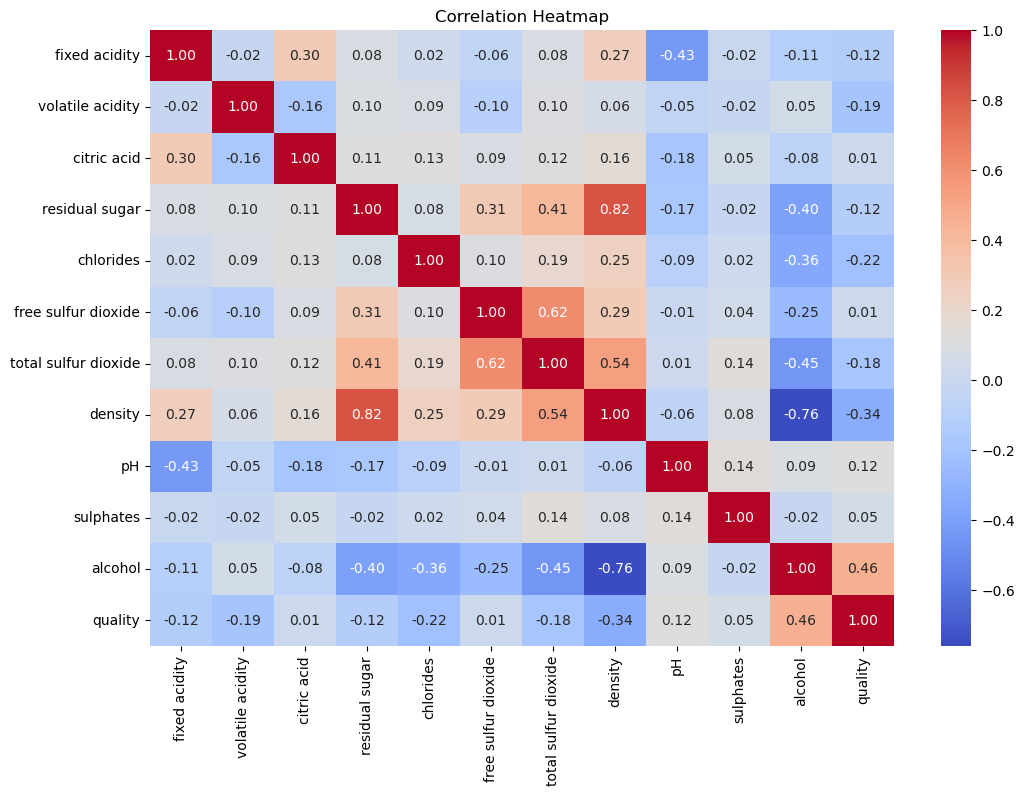


Strong correlations (>|0.7|):
                 residual sugar   density   alcohol
residual sugar             NaN  0.820498       NaN
density               0.820498       NaN -0.760162
alcohol                    NaN -0.760162       NaN
🎯 STEP 8: TARGET VARIABLE (quality) ANALYSIS
Quality value counts:
 quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

Percentage distribution (%):
 quality
6    45.14
5    29.66
7    17.39
4     3.86
8     3.31
3     0.50
9     0.13
Name: proportion, dtype: float64


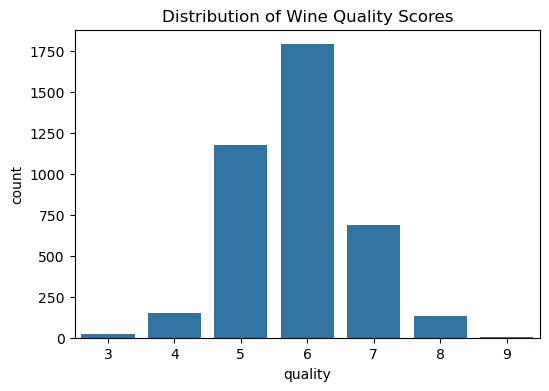


Numeric summary of quality:
 count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

# ==============================
# Step 1: Load Data Set
# ==============================

print("="*50)
print(" STEP 1:Load the dataset ")
print("="*50)


df = pd.read_csv('winequality-white.csv',sep=None, engine='python')
df_original = df.copy()
print("Shape:", df.shape)
print(df.head(2))
df.info()
print(df.describe().round(2))

print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print(df.dtypes)
print(df['quality'].value_counts())
print(df.agg(['min','max']))


# ==============================
# Step 2: Descriptive Statistics
# ==============================
print("="*50)
print("📊 STEP 2: DESCRIPTIVE STATISTICS")
print("="*50)

# Preview first 5 rows
print("First 5 rows of the dataset:\n", df.head(), "\n")

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Numeric summary (mean, std, min, max, quartiles)
print("Numeric summary (transposed):\n", df[numeric_cols].describe().transpose().round(2), "\n")

# Min and Max values for numeric columns
print("Min and Max values per numeric column:\n", df[numeric_cols].agg(['min','max']), "\n")

# Full summary including categorical (counts, unique, top, freq)
print("Full summary (including categorical):\n", df.describe(include='all').transpose().round(2), "\n")

# Missing values per column
missing_per_col = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_per_col, "\n")

# Percentage of missing values per column
missing_percentage = (df.isnull().mean()*100).round(2)
print("Percentage of missing values per column (%):\n", missing_percentage, "\n")



# ==============================
# Step 3: Unique Values / Distribution                                                       
# ==============================
print("="*50)
print("🔢 STEP 3: UNIQUE VALUES / DISTRIBUTION")
print("="*50)

for col in df.columns:
    print(f"\nColumn: {col}")
    print("-"*30)
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts())
    print("Percentage distribution (%):\n", (df[col].value_counts(normalize=True).round(2) * 100))

    # Optional: plot columns with <= 20 unique values
    if df[col].nunique() <= 20:
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.show()
# ==============================
# Step 3: Unique Values / Distribution
# ==============================
print("="*50)
print("🔢 STEP 3: UNIQUE VALUES / DISTRIBUTION")
print("="*50)

for col in df.columns:
    print(f"\nColumn: {col}")
    print("-"*30)
    
    # Number of unique values
    num_unique = df[col].nunique()
    print(f"Number of unique values: {num_unique}")
    
    # Value counts
    value_counts = df[col].value_counts()
    print("Value counts:\n", value_counts)
    
    # Percentage distribution
    value_percent = (df[col].value_counts(normalize=True)*100).round(2)
    print("Percentage distribution (%):\n", value_percent)
    
    # Optional: plot for columns with <= 20 unique values
    if num_unique <= 20:
        import seaborn as sns
        import matplotlib.pyplot as plt
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.show()

# ==============================
# Step 4: Missing Values & Duplicates
# ==============================
print("="*50)
print("❌ STEP 4: MISSING VALUES & DUPLICATES")
print("="*50)

# Missing values
missing_per_col = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", missing_per_col)
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

# Duplicates
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)

# Remove duplicates safely
df.drop_duplicates(inplace=True)
print(f"Duplicates removed. New dataset shape: {df.shape}")

# Optional: handle missing values
# df.dropna(inplace=True)          # drop rows with missing values
# df.fillna(df.median(), inplace=True)   # fill numeric missing values with median

# ==============================
# Step 5: Outlier / Range Check
# ==============================
print("="*50)
print("⚠️ STEP 5: OUTLIER / RANGE CHECK")
print("="*50)

numeric_cols = df.select_dtypes(include='number').columns
print("Min and Max values per numeric column:\n", df[numeric_cols].agg(['min','max']))

# Boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Detect potential outliers using IQR
print("\nPotential outliers (IQR method):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} potential outlier rows")

# Optional: remove outliers safely
df_no_outliers = df.copy()
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= Q1 - 1.5*IQR) & (df_no_outliers[col] <= Q3 + 1.5*IQR)]
print(f"\nShape after removing outliers: {df_no_outliers.shape}")

# Optional: cap outliers (Winsorization)
df_capped = df.copy()
for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    df_capped[col] = df_capped[col].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

print("\nOutlier handling complete. Original dataset remains safe in df_original.")

# ==============================
# Step 6: Zero / Negative Value Checks
# ==============================
print("="*50)
print("⚠️ STEP 6: ZERO / NEGATIVE VALUE CHECKS")
print("="*50)

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Check for zeros and negative values
for col in numeric_cols:
    num_zeros = (df[col] == 0).sum()
    num_negatives = (df[col] < 0).sum()
    print(f"{col}: zeros = {num_zeros}, negatives = {num_negatives}")

# Optional: List rows with zeros or negatives for inspection
print("\nRows with zeros or negative values in any numeric column:")
rows_zero_neg = df[(df[numeric_cols] <= 0).any(axis=1)]
print(rows_zero_neg)
print(f"\nTotal rows with zeros or negatives: {rows_zero_neg.shape[0]}")

# ==============================
# Step 7: Correlation Analysis / Feature Relationships
# ==============================
print("="*50)
print("🔗 STEP 7: CORRELATION ANALYSIS")
print("="*50)

import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print correlation matrix rounded to 2 decimals
print("Correlation matrix:\n", corr_matrix.round(2))

# Plot heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Optional: Identify strong correlations (>|0.7|)
strong_corr = corr_matrix[(corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)]
print("\nStrong correlations (>|0.7|):\n", strong_corr.dropna(how='all').dropna(axis=1, how='all'))


# ==============================
# Step 8: Target Variable Analysis
# ==============================
print("="*50)
print("🎯 STEP 8: TARGET VARIABLE (quality) ANALYSIS")
print("="*50)

# Value counts of target
print("Quality value counts:\n", df['quality'].value_counts())

# Percentage distribution
print("\nPercentage distribution (%):\n", (df['quality'].value_counts(normalize=True)*100).round(2))

# Optional: plot distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality Scores")
plt.show()

# Summary statistics of quality
print("\nNumeric summary of quality:\n", df['quality'].describe())



# ==============================
# Save cleaned datasets to CSV
# ==============================

# ---------- Version 1: Descriptive Comments ----------
# Save the cleaned dataset
#df.to_csv("winequality_white_cleaned.csv", index=False)

# Optional: save versions without outliers or capped outliers
#df_no_outliers.to_csv("winequality_white_no_outliers.csv", index=False)
#df_capped.to_csv("winequality_white_capped.csv", index=False)

# Descriptions:
# winequality_white_cleaned.csv       → main cleaned version
# winequality_white_no_outliers.csv   → duplicates and outliers removed
# winequality_white_capped.csv        → outliers capped (Winsorization)

# ---------- Version 2: Concise ----------
# Save cleaned dataset to CSV
df.to_csv("winequality_white_cleaned.csv", index=False)

# Save optional versions
df_no_outliers.to_csv("winequality_white_no_outliers.csv", index=False)
df_capped.to_csv("winequality_white_capped.csv", index=False)





✅ Cleaned dataset loaded.

Dataset shape: (3961, 12)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB
None

First 5 rows:
    fixed acidity  volatile acidity  citr

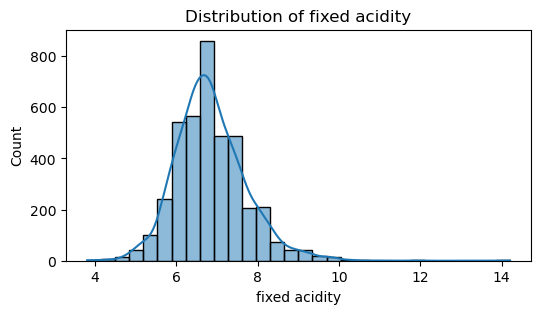

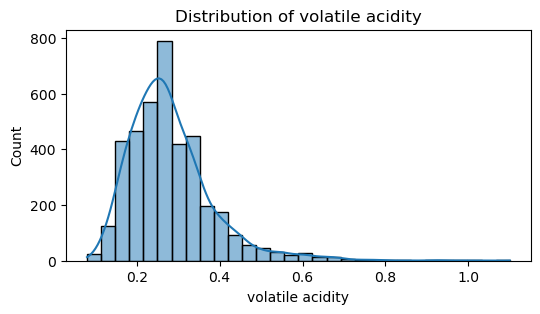

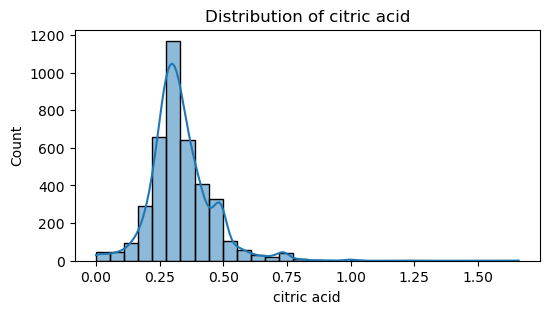

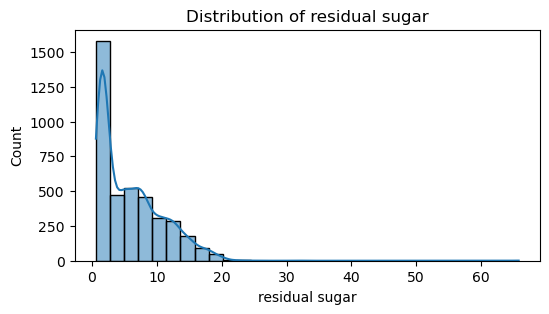

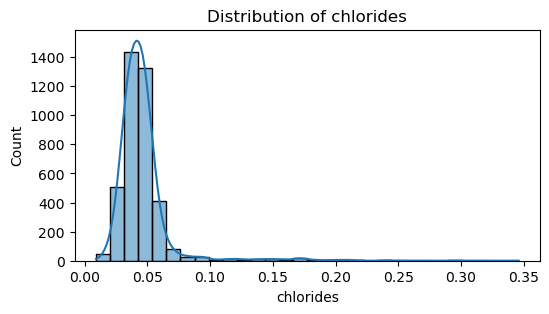

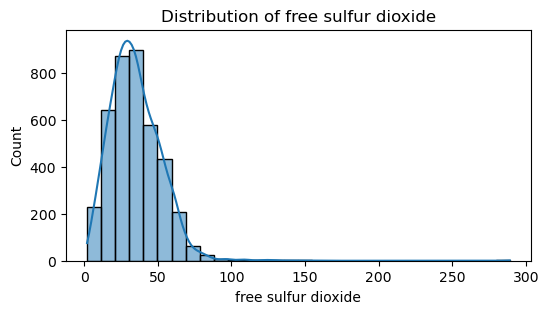

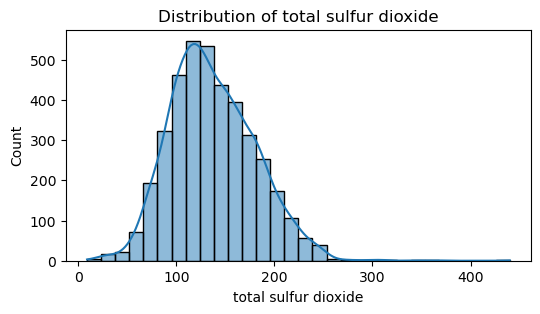

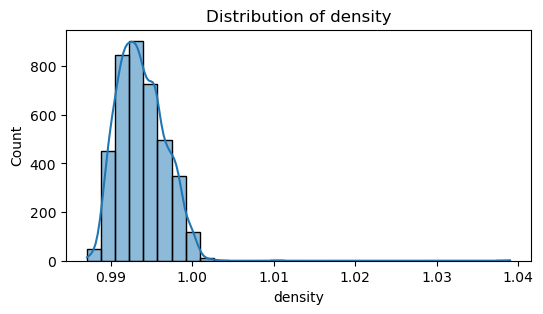

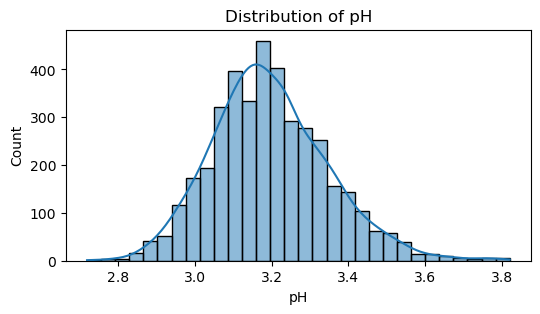

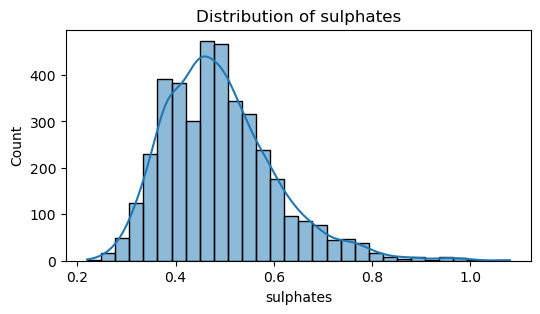

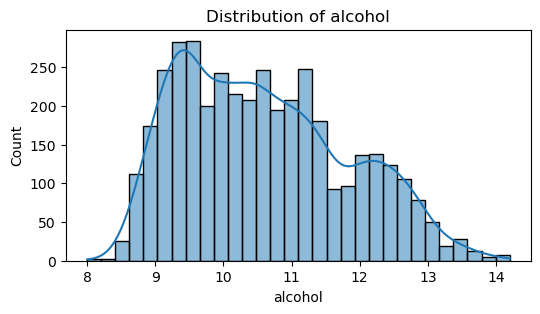

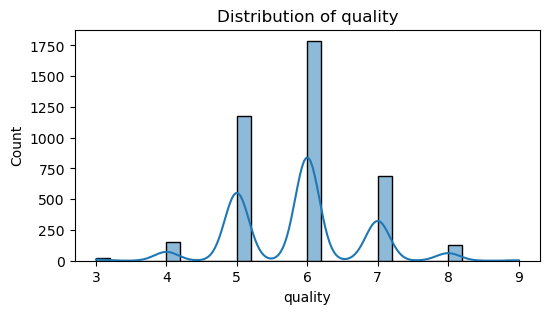

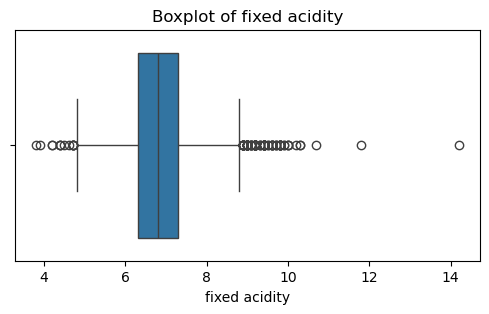

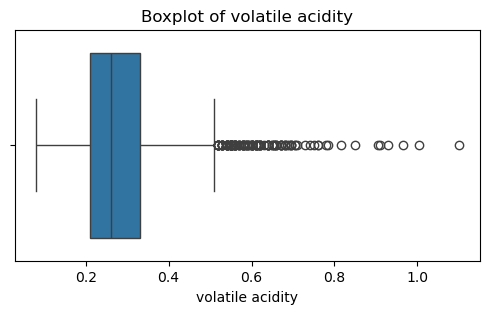

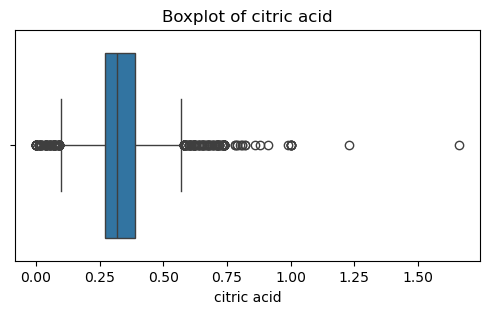

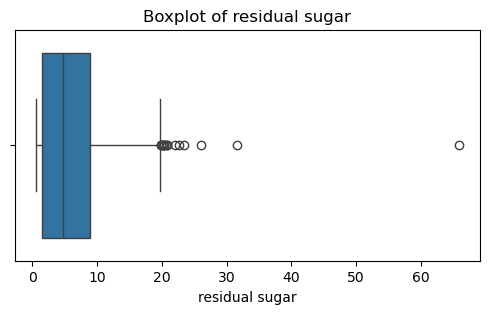

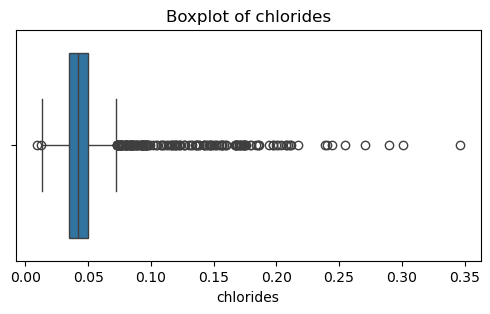

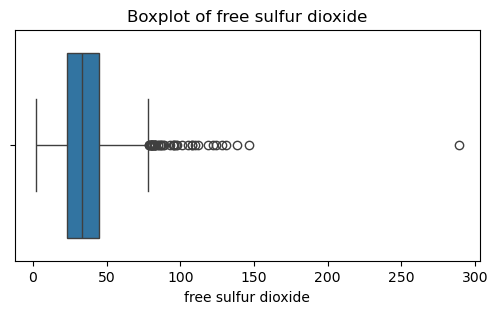

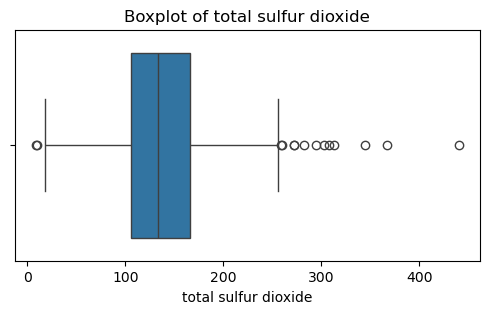

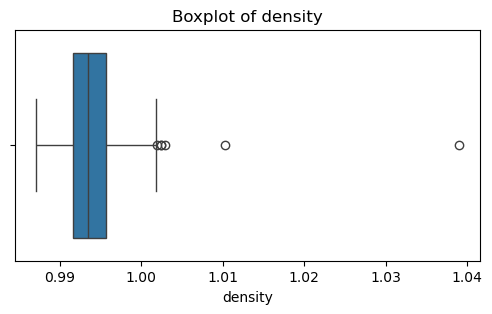

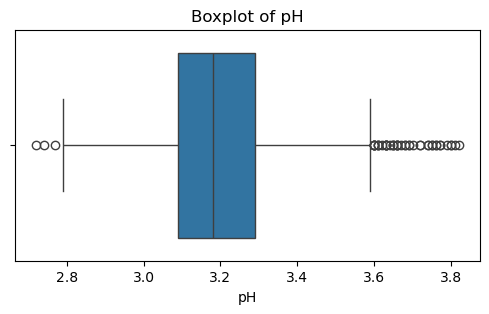

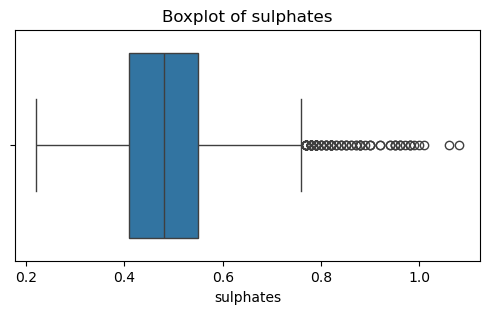

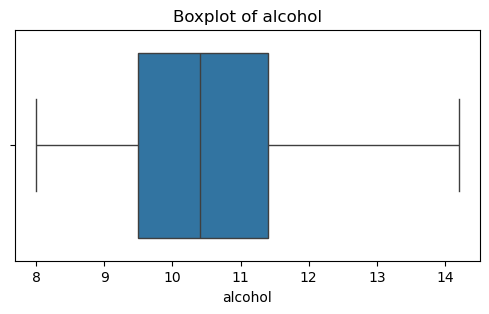

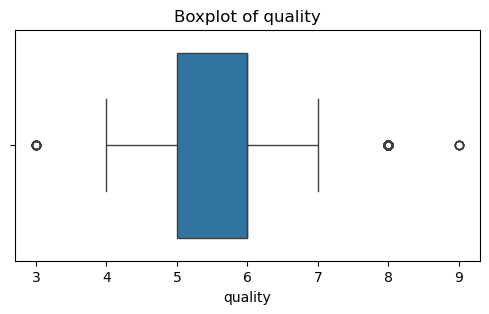

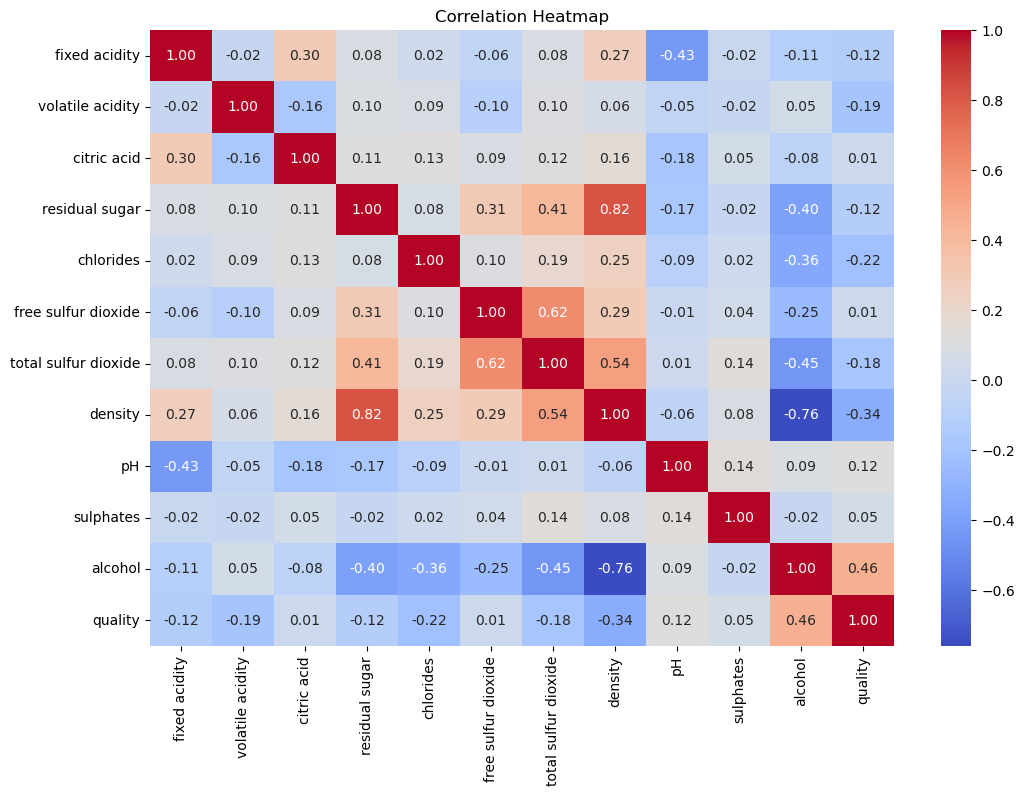


Strong correlations (>|0.7|):
                 residual sugar   density   alcohol
residual sugar             NaN  0.820498       NaN
density               0.820498       NaN -0.760162
alcohol                    NaN -0.760162       NaN


In [5]:
# ==============================
# Full Visual Audit + Correlation
# ==============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df_cleaned = pd.read_csv("winequality_white_cleaned.csv")
print("✅ Cleaned dataset loaded.\n")

# Basic info
print("Dataset shape:", df_cleaned.shape)
print("\nData info:")
print(df_cleaned.info())
print("\nFirst 5 rows:\n", df_cleaned.head())

# Numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns

# 1️⃣ Missing values check
missing_per_col = df_cleaned.isnull().sum()
missing_percent = (df_cleaned.isnull().mean()*100).round(2)
print("\nMissing values per column:\n", missing_per_col)
print("\nPercentage of missing values per column (%):\n", missing_percent)

# 2️⃣ Duplicates check
print("\nNumber of duplicate rows:", df_cleaned.duplicated().sum())

# 3️⃣ Numeric summary
print("\nNumeric summary:\n", df_cleaned[numeric_cols].describe().round(2))

# 4️⃣ Min/Max check
print("\nMin and Max per numeric column:\n", df_cleaned[numeric_cols].agg(['min','max']))

# 5️⃣ Zero / Negative check
for col in numeric_cols:
    zeros = (df_cleaned[col] == 0).sum()
    negatives = (df_cleaned[col] < 0).sum()
    print(f"{col}: zeros = {zeros}, negatives = {negatives}")

# 6️⃣ Visual distributions
for col in df_cleaned.columns:
    plt.figure(figsize=(6,3))
    if col in numeric_cols:
        sns.histplot(df_cleaned[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
    else:
        sns.countplot(x=col, data=df_cleaned)
        plt.title(f"Counts of {col}")
    plt.show()

# 7️⃣ Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 8️⃣ Correlation heatmap
corr_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# 9️⃣ Highlight strong correlations (>|0.7|)
strong_corr = corr_matrix[(corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)]
print("\nStrong correlations (>|0.7|):\n", strong_corr.dropna(how='all').dropna(axis=1, how='all'))


C:\Users\Siddhartha\AppData\Local\Temp\ipykernel_8624\1012243160.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette=colors)


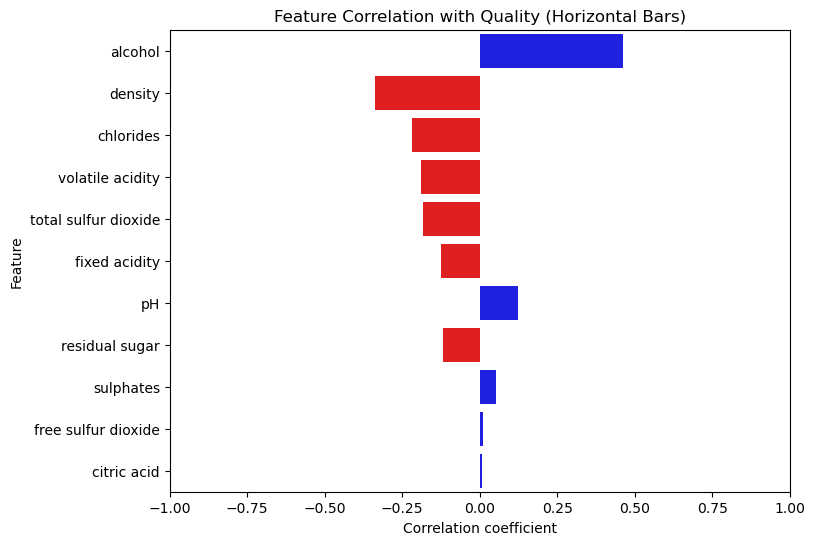


Feature correlations with Quality:
 alcohol                 0.46
density                -0.34
chlorides              -0.22
volatile acidity       -0.19
total sulfur dioxide   -0.18
fixed acidity          -0.12
pH                      0.12
residual sugar         -0.12
sulphates               0.05
free sulfur dioxide     0.01
citric acid             0.01
Name: quality, dtype: float64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df_cleaned = pd.read_csv("winequality_white_cleaned.csv")

# Compute correlation with target 'quality'
corr_target = df_cleaned.corr()['quality'].drop('quality')  # exclude self-correlation

# Sort by absolute correlation
corr_target_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

# Assign colors: blue for positive, red for negative
colors = ['blue' if val > 0 else 'red' for val in corr_target_sorted.values]

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette=colors)
plt.title("Feature Correlation with Quality (Horizontal Bars)")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.xlim(-1,1)  # fixed x-axis range
plt.show()

# Print correlations for reference
print("\nFeature correlations with Quality:\n", corr_target_sorted.round(2))







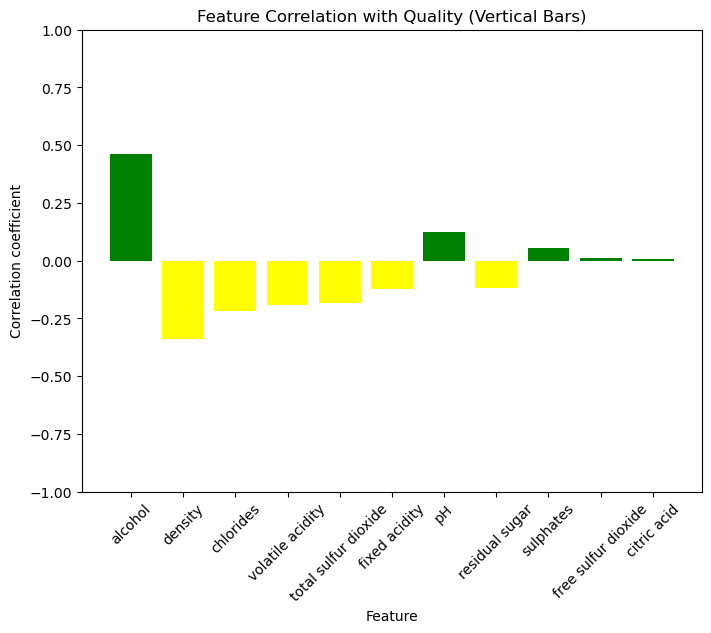


Feature correlations with Quality:
 alcohol                 0.46
density                -0.34
chlorides              -0.22
volatile acidity       -0.19
total sulfur dioxide   -0.18
fixed acidity          -0.12
pH                      0.12
residual sugar         -0.12
sulphates               0.05
free sulfur dioxide     0.01
citric acid             0.01
Name: quality, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df_cleaned = pd.read_csv("winequality_white_cleaned.csv")

# Compute correlation with target 'quality'
corr_target = df_cleaned.corr()['quality'].drop('quality')  # exclude self-correlation

# Sort by absolute correlation
corr_target_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

# Assign colors: blue for positive, red for negative
colors = ['green' if val > 0 else 'yellow' for val in corr_target_sorted.values]

# Plot vertical bar chart using Matplotlib (warning-free)
plt.figure(figsize=(8,6))
plt.bar(x=corr_target_sorted.index, height=corr_target_sorted.values, color=colors)
plt.title("Feature Correlation with Quality (Vertical Bars)")
plt.ylabel("Correlation coefficient")
plt.xlabel("Feature")
plt.ylim(-1,1)  # fixed y-axis range
plt.xticks(rotation=45)
plt.show()

# Print correlations for reference
print("\nFeature correlations with Quality:\n", corr_target_sorted.round(2))



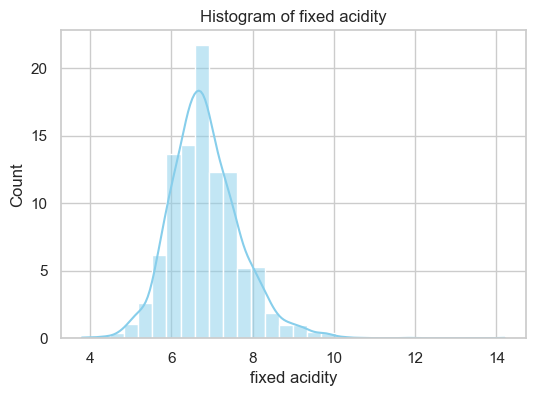

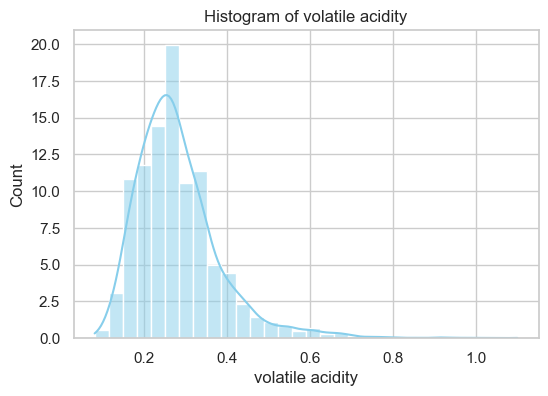

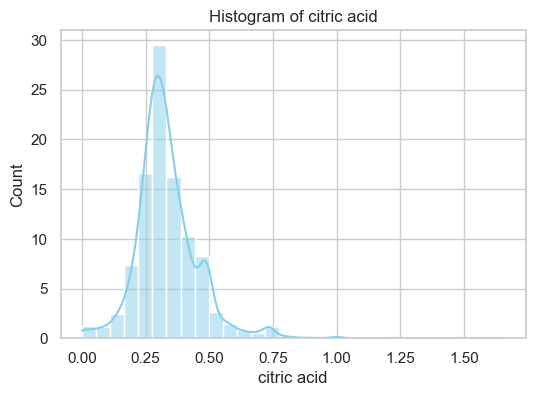

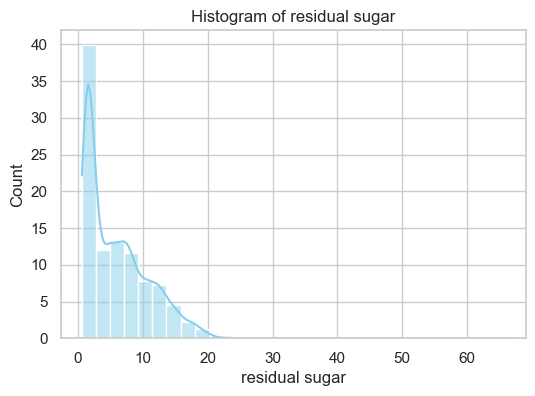

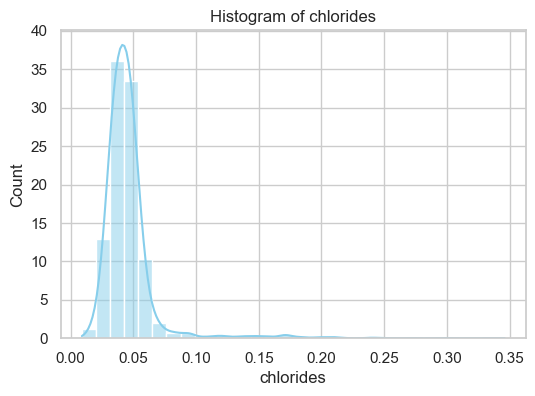

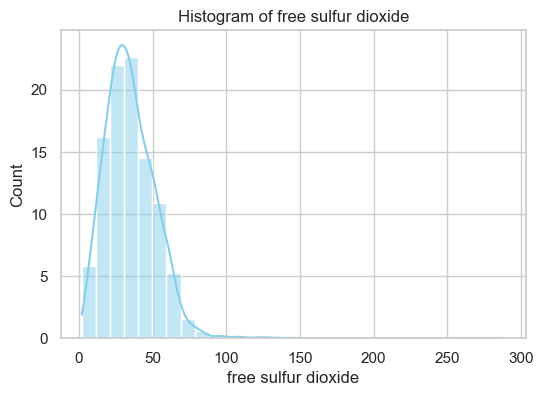

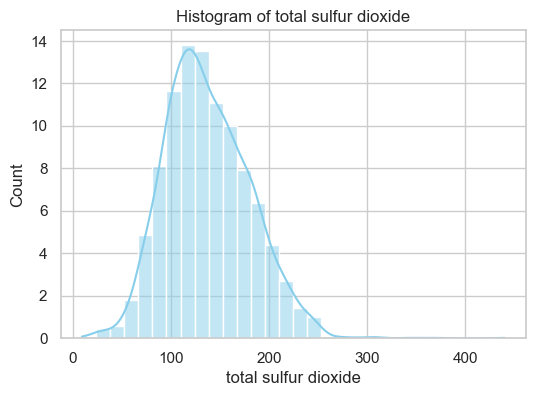

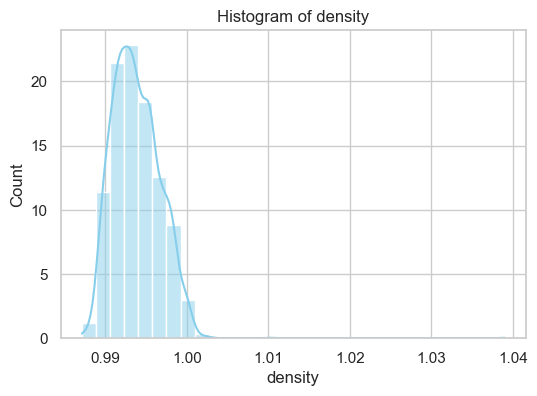

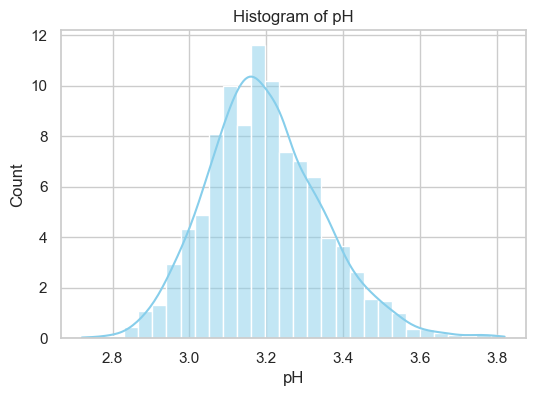

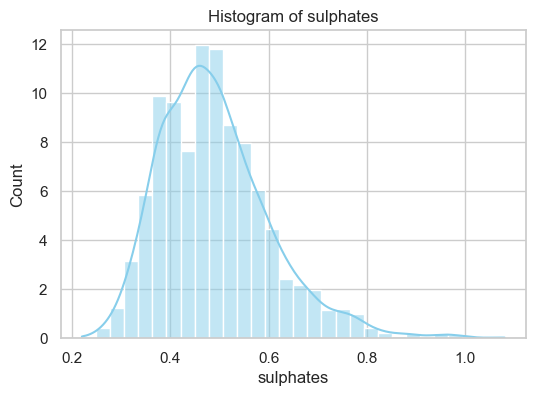

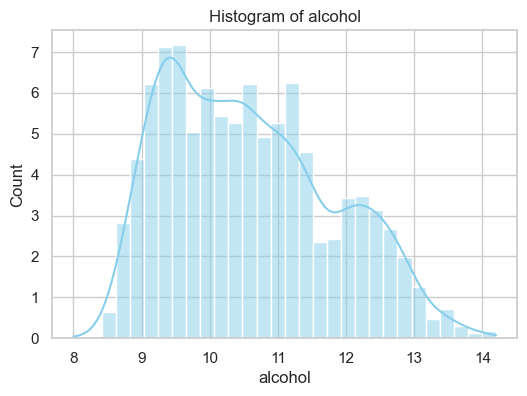

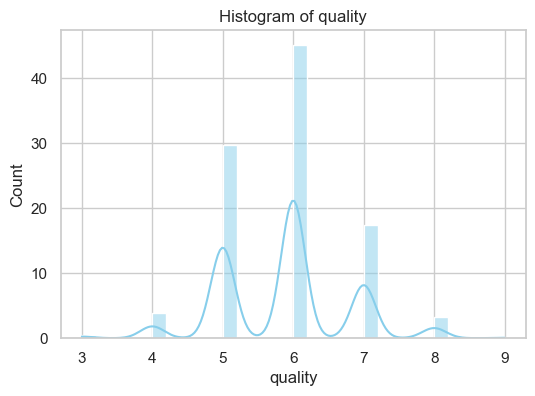

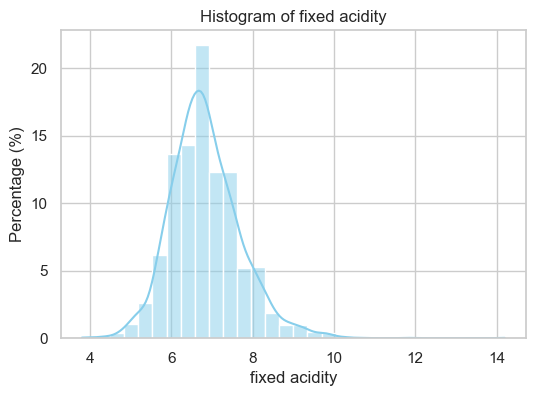

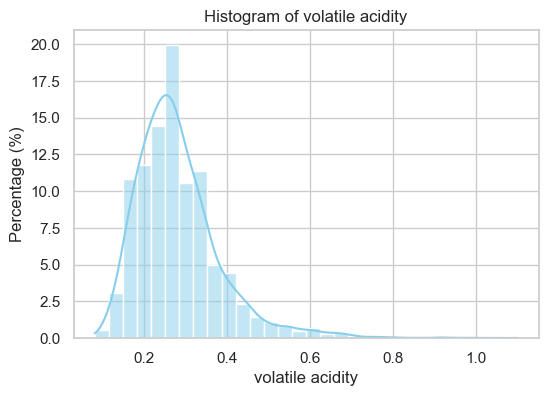

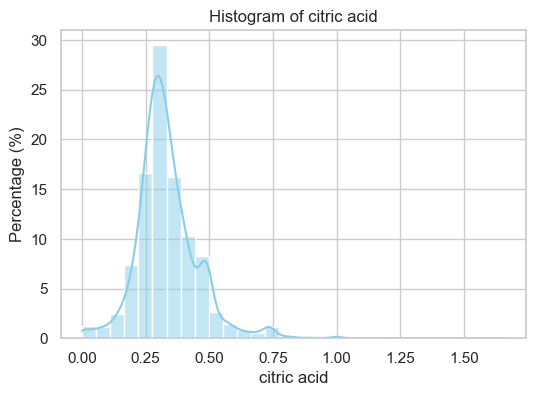

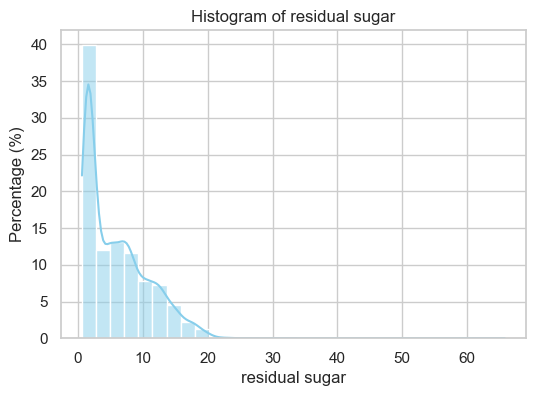

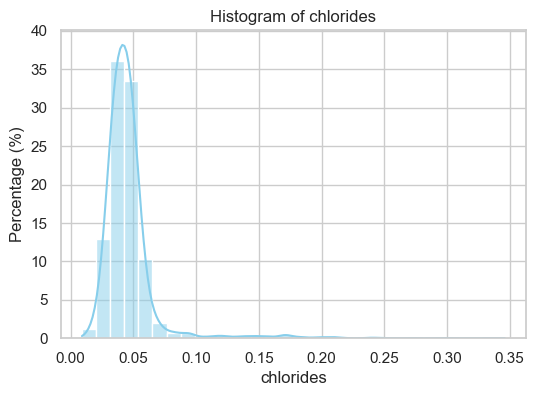

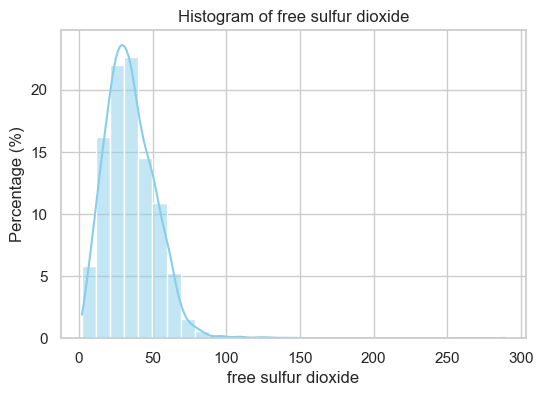

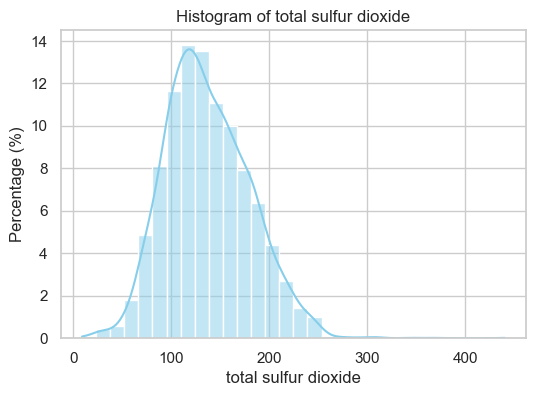

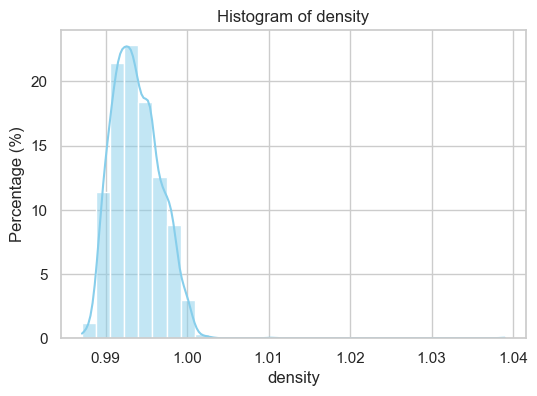

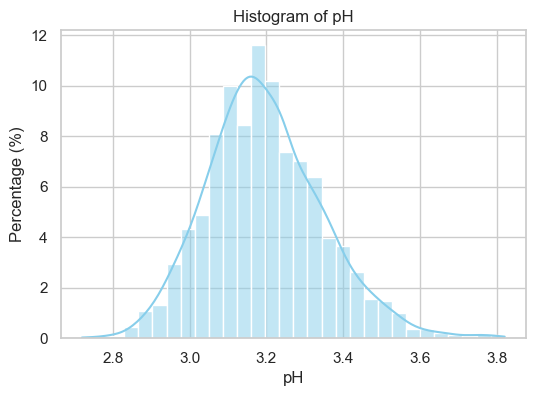

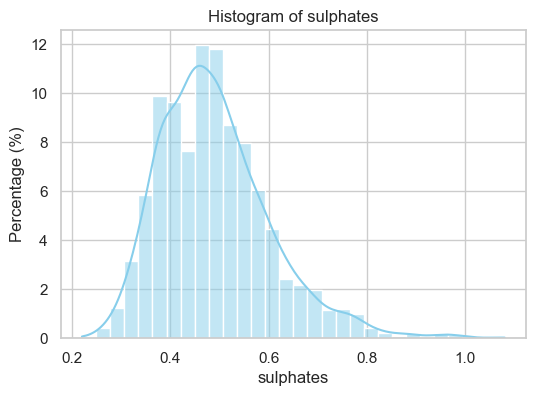

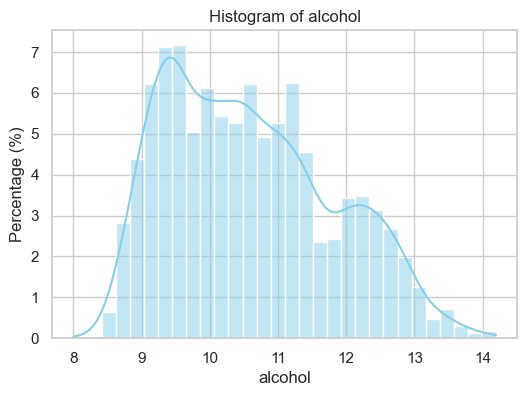

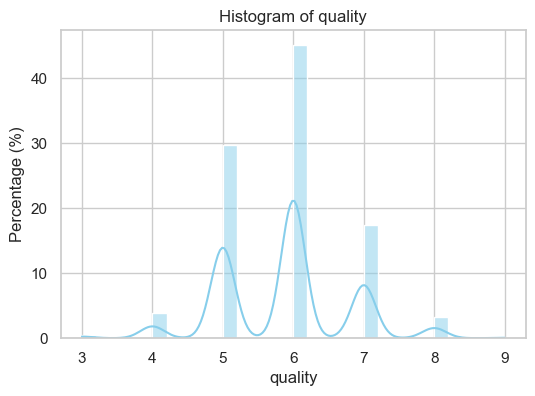

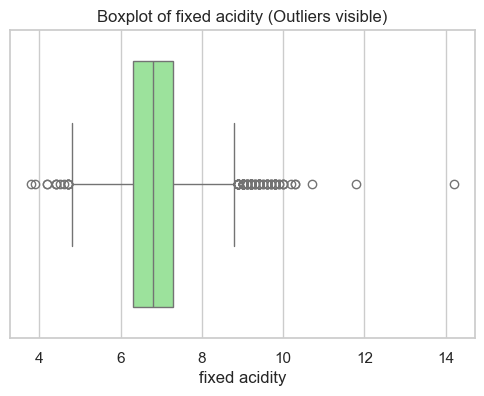

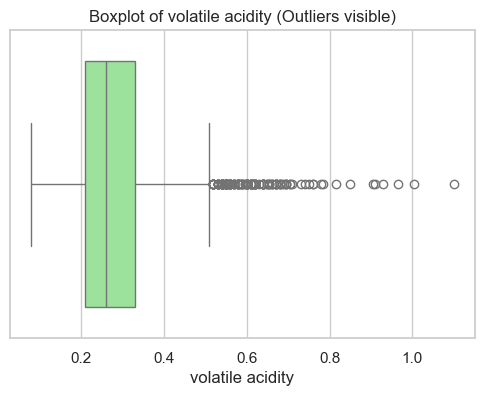

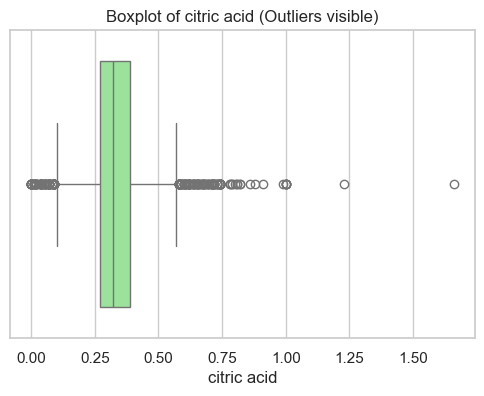

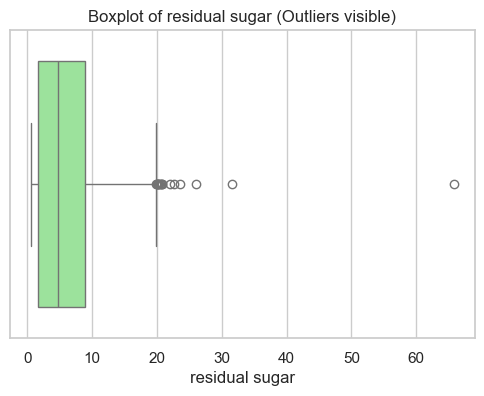

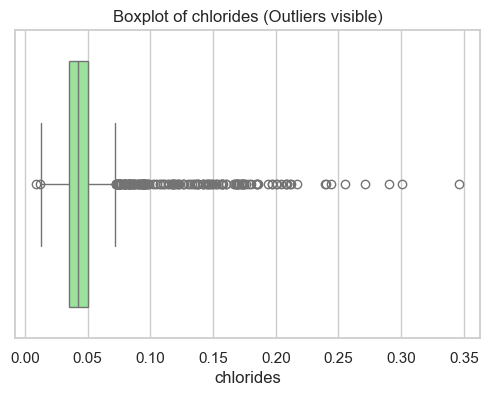

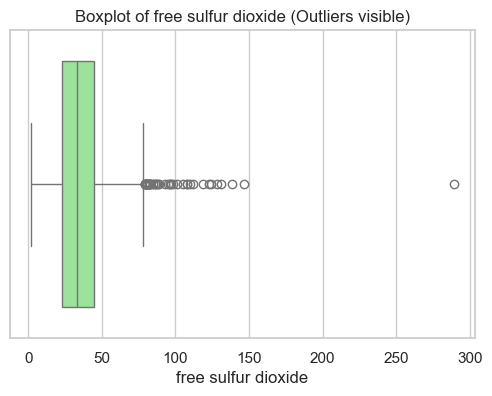

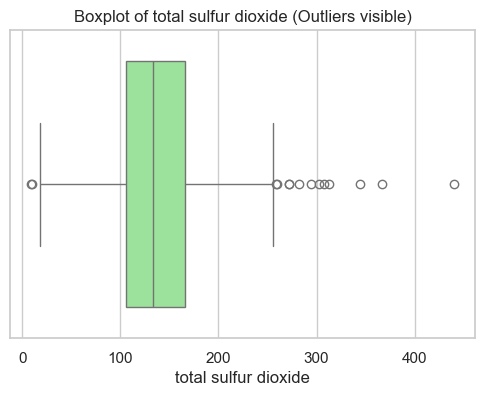

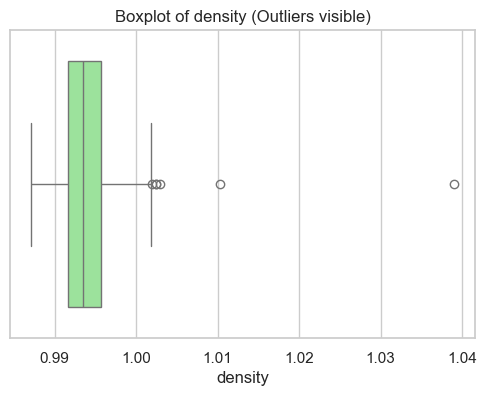

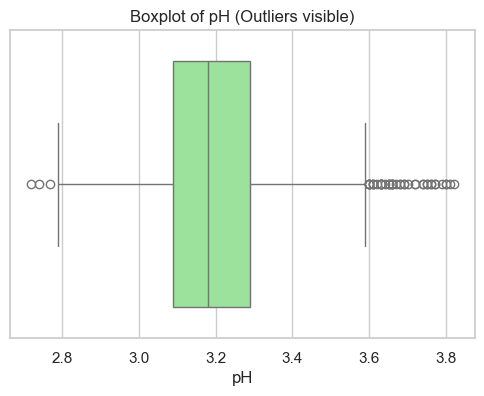

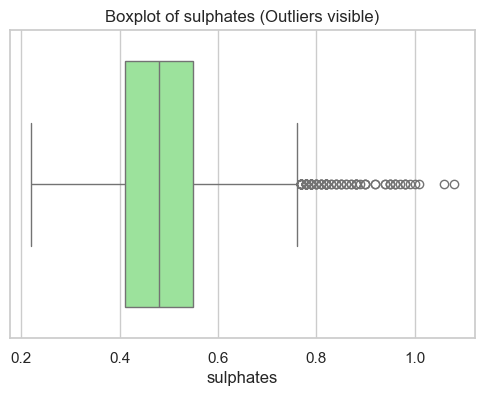

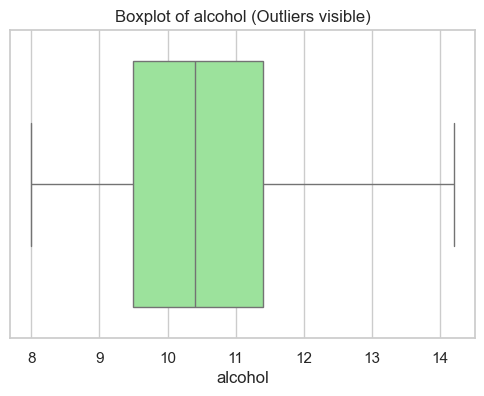

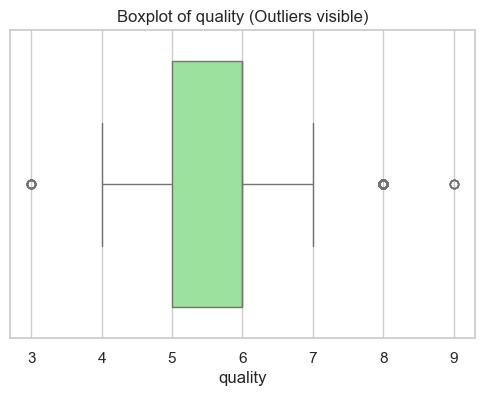

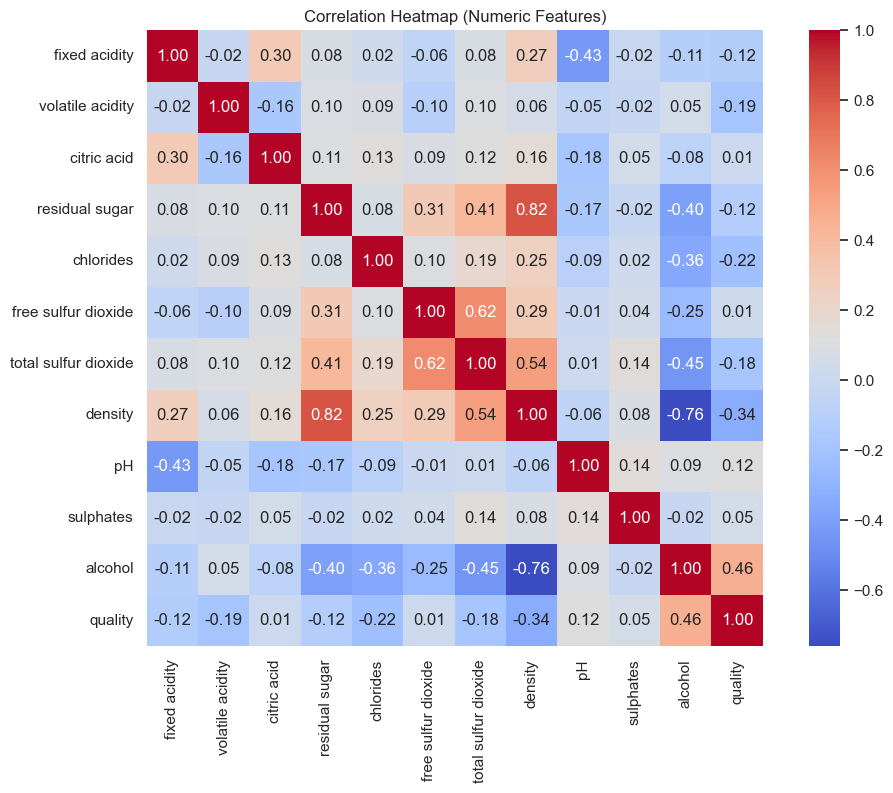

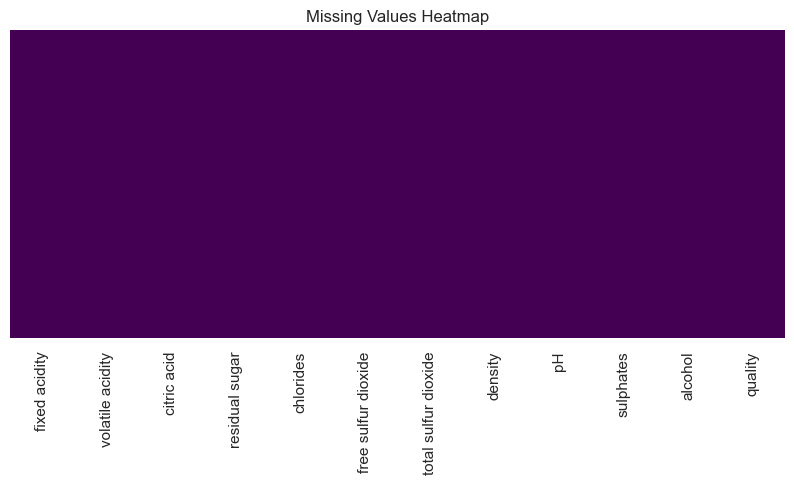

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

# --- Load cleaned dataset ---
df = pd.read_csv("winequality_white_cleaned.csv")

# --- Set style ---
sns.set(style="whitegrid")

# --- Identify numeric and categorical columns ---
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# --- 1️⃣ Numeric Feature Distributions (Histograms) ---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue',stat="percent")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
   # ax = plt.subplots()
     plt.ylabel('Count')
    plt.show()
    


# --- 2️⃣ Boxplots for Outlier Detection ---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (Outliers visible)')
    plt.xlabel(col)
    plt.show()

# --- 3️⃣ Categorical Column Counts ---
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# --- 4️⃣ Correlation Heatmap (Numeric Columns) ---
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# --- 5️⃣ Missing Values Heatmap (if any) ---
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [3]:

import pandas as pd

# Try reading as CSV
file_path = "winequality_white_cleaned.csv"

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print("Error reading as CSV:", e)
    # If CSV fails, try reading as Excel
    df = pd.read_excel(file_path)

print(df.head())  # check first rows



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
df.to_excel("cleaned_data.xlsx", index=False)

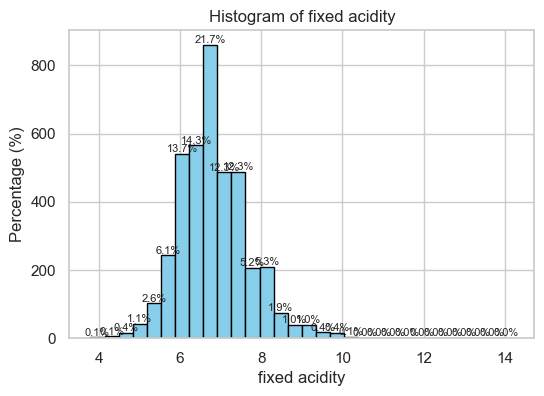

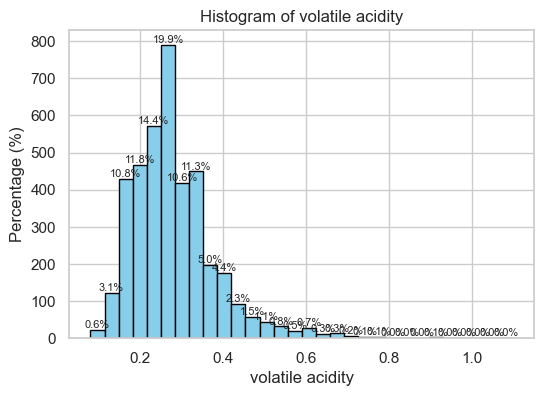

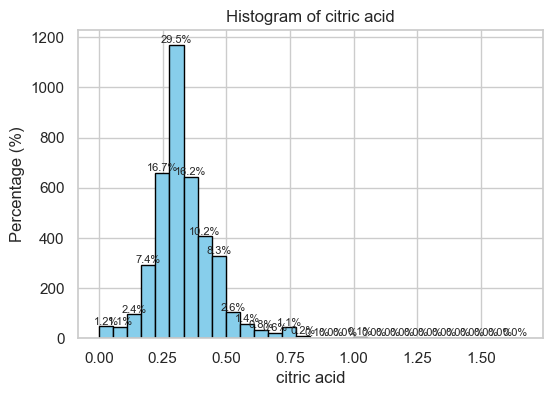

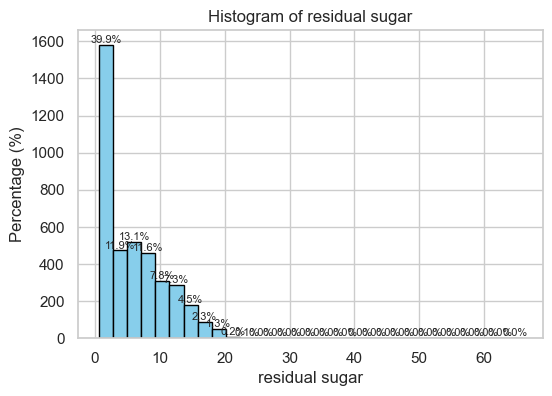

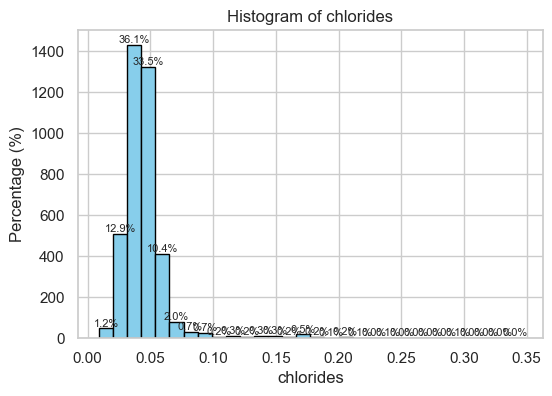

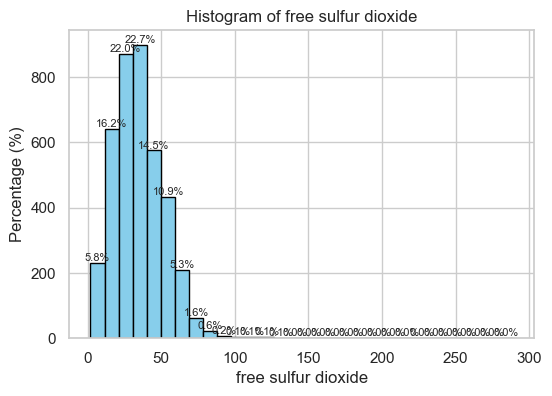

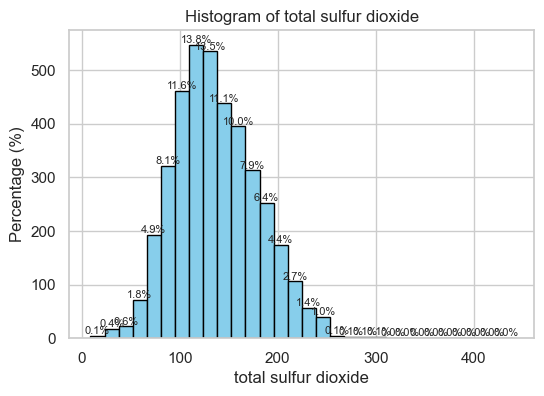

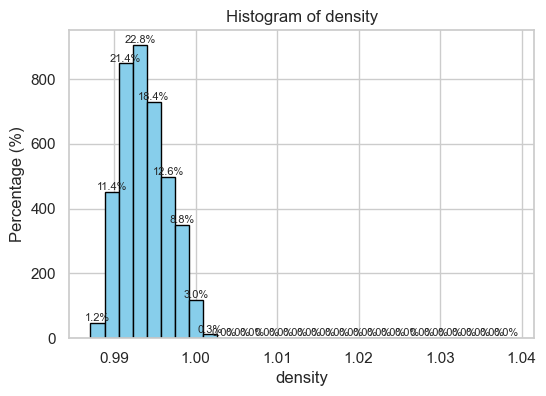

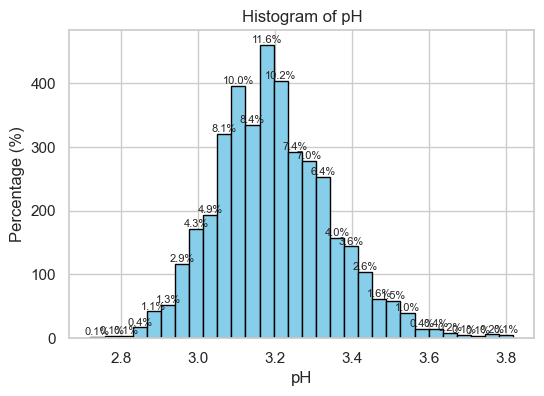

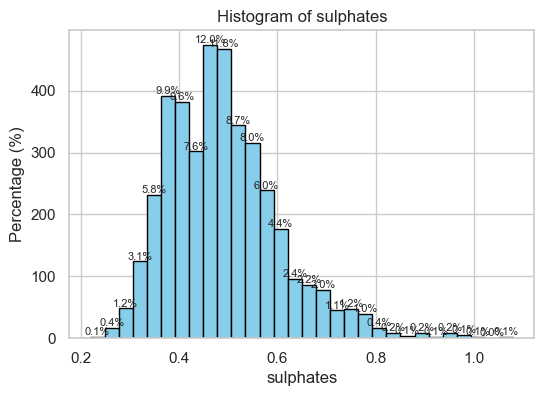

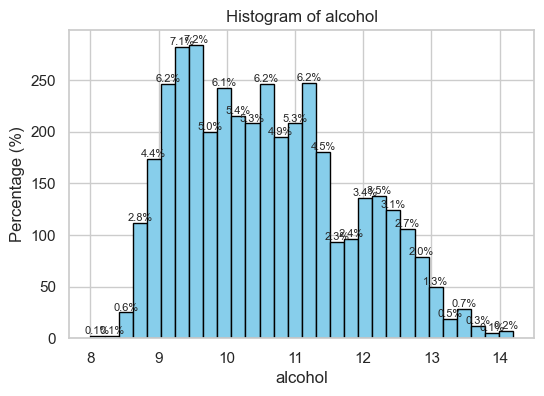

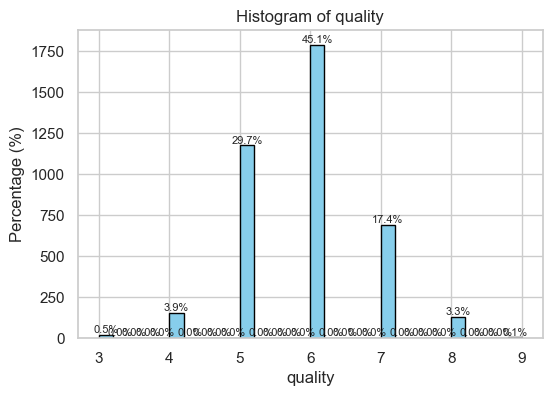

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

# --- Load dataset ---
df = pd.read_csv("winequality_white_cleaned.csv")

# --- Set style ---
sns.set(style="whitegrid")

# --- Identify numeric columns ---
numeric_cols = df.select_dtypes(include='number').columns

# --- Plot histograms with percentage labels ---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    
    # Create histogram (percentages)
    counts, bins, patches = plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    total = sum(counts)
    percentages = [(count/total)*100 for count in counts]
    
    # Add percentage labels on top of bars
    for patch, pct in zip(patches, percentages):
        height = patch.get_height()
        plt.text(patch.get_x() + patch.get_width()/2, height, f'{pct:.1f}%', 
                 ha='center', va='bottom', fontsize=8)
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.show()




C:\Users\Siddhartha\AppData\Local\Temp\ipykernel_1044\1089162317.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette=colors)


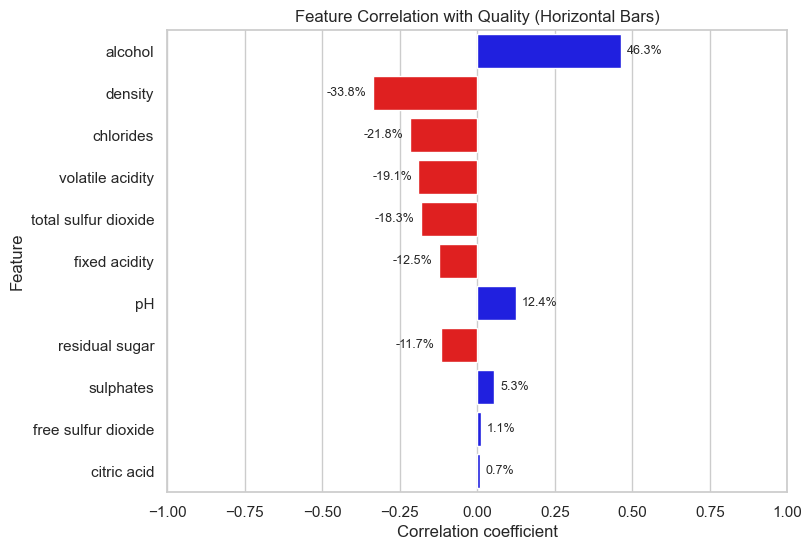


Feature correlations with Quality:
 alcohol                 0.46
density                -0.34
chlorides              -0.22
volatile acidity       -0.19
total sulfur dioxide   -0.18
fixed acidity          -0.12
pH                      0.12
residual sugar         -0.12
sulphates               0.05
free sulfur dioxide     0.01
citric acid             0.01
Name: quality, dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load cleaned dataset ---
df_cleaned = pd.read_csv("winequality_white_cleaned.csv")

# --- Compute correlation with target 'quality' ---
corr_target = df_cleaned.corr()['quality'].drop('quality')  # exclude self-correlation

# --- Sort by absolute correlation ---
corr_target_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

# --- Assign colors: blue for positive, red for negative ---
colors = ['blue' if val > 0 else 'red' for val in corr_target_sorted.values]

# --- Plot horizontal bar chart ---
plt.figure(figsize=(8,6))
bars = sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette=colors)

# --- Add correlation percentage labels on bars ---
for bar, val in zip(bars.patches, corr_target_sorted.values):
    width = bar.get_width()
    plt.text(width + 0.02*np.sign(width),   # offset slightly to the right for positive, left for negative
             bar.get_y() + bar.get_height()/2,
             f'{val*100:.1f}%', 
             ha='left' if val>0 else 'right', 
             va='center', fontsize=9)

plt.title("Feature Correlation with Quality (Horizontal Bars)")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.xlim(-1, 1)
plt.show()

# --- Print correlations for reference ---
print("\nFeature correlations with Quality:\n", corr_target_sorted.round(2))
